In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 49 Lecture 2 Assignment

In this assignment, we will apply mean shift clustering to a dataset containing the results of a survey on financial wellbeing.

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
import seaborn as sns

<IPython.core.display.Javascript object>

This dataset contains the results of a survey on a financial wellbeing conducted by the US Consumer Finance Protection Bureau that were published in October 2017. This dataset has a large number of columns, most of which correspond to specific questions on the survey. These codebook for translating the column names to questions can be found here:

https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

Load the dataset.

In [4]:
# answer goes here
fin = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Clustering/financial_wellbeing.csv"
)
fin.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


<IPython.core.display.Javascript object>

While the survey questions have the potential for interesting cluster analysis, we will stick to the "score" columns to avoid clustering in an unreasonably high-dimensional space. The columns we are interested in all have "score" in their names; identify and isolate these columns. (There should be 4 in total.)

In [5]:
# answer goes here
scores = fin.filter(like = 'score')
scores.head()

,FWBscore,FSscore,LMscore,KHscore
0,55,44,3,1.267
1,51,43,3,-0.570
2,49,42,3,-0.188
3,49,42,2,-1.485
4,49,42,1,-1.900


<IPython.core.display.Javascript object>

Standardize the features in your dataset using scikit-learn's StandardScaler, which will set the mean of each feature to 0 and the variance to 1.

In [6]:
# answer goes here
scaler = StandardScaler()
scores_std = scaler.fit_transform(scores)
scores_std

array([[-0.07306245, -0.53090616,  0.65383032,  1.62471561],
       [-0.35567668, -0.6099205 ,  0.65383032, -0.62962645],
       [-0.4969838 , -0.68893483,  0.65383032, -0.16084111],
       ...,
       [ 0.20955178,  0.02219421, -0.67039872, -1.42116191],
       [-0.70894447,  0.25923722, -0.67039872, -1.42116191],
       [-0.4969838 , -0.68893483, -0.67039872, -1.42116191]])

<IPython.core.display.Javascript object>

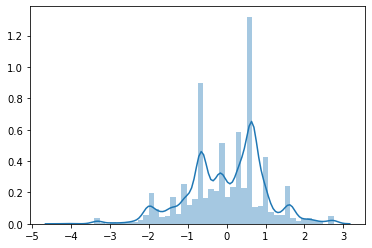

<IPython.core.display.Javascript object>

In [10]:
sns.distplot(scores_std)
plt.show()

Run mean shift clustering on the scores in the survey dataset using the default bandwidth. Then answer the following by printing or typing as appropriate:

- How many clusters are produced? 
- What are the cluster centers?
- How many responses are assigned to each cluster?
- Are these results reasonable? If not, what changes should we make?

In [7]:
# answer goes here
ms = MeanShift()
ms.fit(scores_std)


MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

<IPython.core.display.Javascript object>

In [11]:
#number of clusters
pd.Series(ms.labels_).value_counts()

0    6326
1      68
dtype: int64

<IPython.core.display.Javascript object>

In [12]:
scaler.inverse_transform(ms.cluster_centers_)

array([[57.43795268, 50.12143892,  2.8143409 ,  0.21741429],
       [-1.        , -1.        ,  0.25      , -1.826     ]])

<IPython.core.display.Javascript object>

Try changing the appropriate parameters of the mean shift algorithm to achieve a better clustering result. Answer all of the same questions from the previous clustering step.

In [13]:
# answer goes here
ms = MeanShift(bandwidth=1)
ms.fit(scores_std)
pd.Series(ms.labels_).value_counts()




0     3215
1     1353
2      441
4      229
9      132
7      130
25     119
16     117
15     100
3       85
5       74
17      63
14      54
6       39
13      30
10      25
11      24
24      19
32      18
8       14
22      13
35      12
36      12
37      11
27      11
34      10
38       6
30       5
40       5
12       5
33       4
29       4
18       3
20       2
31       2
21       2
19       2
23       1
28       1
26       1
39       1
dtype: int64

<IPython.core.display.Javascript object>

In [14]:
scaler.inverse_transform(ms.cluster_centers_)

array([[ 5.87273403e+01,  5.06872214e+01,  3.00000000e+00,
         3.69295691e-01],
       [ 5.20393375e+01,  4.52194617e+01,  2.00000000e+00,
        -6.41718427e-01],
       [ 4.91689498e+01,  4.17214612e+01,  1.00000000e+00,
        -1.06909589e+00],
       [ 4.81551724e+01,  4.40344828e+01,  0.00000000e+00,
        -1.35158621e+00],
       [ 7.86000000e+01,  7.68000000e+01,  2.00000000e+00,
        -5.52033333e-01],
       [ 5.31851852e+01,  7.48888889e+01,  1.00000000e+00,
        -1.33103704e+00],
       [ 3.29583333e+01,  7.37083333e+01,  1.00000000e+00,
        -1.43104167e+00],
       [ 3.03000000e+01,  6.41500000e+01,  2.00000000e+00,
        -5.87700000e-01],
       [ 7.74166667e+01,  8.03333333e+01,  1.00000000e+00,
        -1.47150000e+00],
       [ 8.64545455e+01,  8.26363636e+01,  2.00000000e+00,
         3.34727273e-01],
       [ 7.25000000e+01,  7.77500000e+01,  1.00000000e+00,
        -6.39875000e-01],
       [ 6.01666667e+01,  6.78333333e+01,  0.00000000e+00,
      

<IPython.core.display.Javascript object>